In [1]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.callbacks import TensorBoard, ModelCheckpoint, CSVLogger
from keras.optimizers import Adam
from keras.models import Model, Sequential, load_model
from keras.layers import Input, LSTM, Dense, TimeDistributed, Lambda, Dropout
from keras import backend as K
from keras import regularizers
from data_utils import DataSet
from model.lstm_model import LSTM_model

In [2]:
import os
import json
import pickle

# Evaluating Hyperparameters for InceptionV3 model

In [9]:
#data is pre-trained using the InceptionV3 model

### ---- LOAD PARAMETERS FOR TRAINING ---- #


In [19]:
json_path = os.path.join('model','params.json')

with open(json_path) as f:
    params = json.load(f)

    learning_rate = params['learning_rate']
    decay = params['decay']

    hidden_units = params['hidden_units']
    dense_units = params['dense_units']

    reg = params['reg']
    dropout_rate = params['dropout_rate']

    batch_size = params['batch_size']
    nb_epoch = params['nb_epoch']

    # --- other parameters --- #
    train_size = params['train_size']
    num_classes = params['num_classes']
    seq_length = params['seq_length']

In [16]:
#hyperparameters to try

# # --- LEARNING RATES --- #
# learning_rates = [1e-7, 1e-5, 1e-3]  

# # --- BATCH SIZES --- #
# batch_sizes = [2**3, 2**5, 2**7, 2**9] 

# --- HIDDEN UNITS --- #
# num_hidden = [128, 256, 512]

# --- DENSE UNITS --- #
# num_dense = [64, 128, 256]

### --- TRAIN & EVAL  (VARY LEARNING RATE AND BATCH SIZE) --- #

In [4]:
#load training data

dataset = DataSet(None, seq_length)
(x_train, y_train) = dataset.get_extracted_sequences('train', 1)
(x_val, y_val) = dataset.get_extracted_sequences('validation', 1)

In [17]:
for lr in learning_rates:
    for bs in batch_sizes:
        learning_rate = lr
        batch_size = bs
        # setup optimizer: ADAM algorithm
        optimizer = Adam(lr=learning_rate, decay=decay)
        # metrics for judging performance of model
        metrics = ['categorical_accuracy']

        #lstm model
        init = LSTM_model(hidden_units=hidden_units, dense_units=dense_units, reg=reg, dropout_rate=dropout_rate, seq_length=seq_length, num_classes=num_classes)
        model = init.model
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)

        history = model.fit(
            x_train,
            y_train,
            batch_size=batch_size,
            epochs=nb_epoch,
            verbose=0
        )

        x_test, y_test = dataset.get_extracted_sequences('test')

        print(f'Learning rate: {learning_rate} and Bath size: {batch_size}')

        score = model.evaluate(x=x_train, y=y_train, verbose=1)
        print("Train Loss: %2.3f" % score[0])
        print("Train Accuracy: %1.3f\n" % score[1])

        score = model.evaluate(x=x_val, y=y_val, verbose=1)
        print("Val Loss: %2.3f" % score[0])
        print("Val Accuracy: %1.3f\n" % score[1])

        score = model.evaluate(x=x_test, y=y_test, verbose=1)
        print("Test Loss: %2.3f" % score[0])
        print("Test Accuracy: %1.3f\n" % score[1])

Learning rate: 1e-07 and Bath size: 8
13/13 [==============================] - 1s 37ms/step - loss: 1.0914 - categorical_accuracy: 0.3914
Train Loss: 1.091
Train Accuracy: 0.391

2/2 [==============================] - 0s 23ms/step - loss: 1.1056 - categorical_accuracy: 0.3333
Val Loss: 1.106
Val Accuracy: 0.333

2/2 [==============================] - 0s 27ms/step - loss: 1.1158 - categorical_accuracy: 0.3137
Test Loss: 1.116
Test Accuracy: 0.314

Learning rate: 1e-07 and Bath size: 32
13/13 [==============================] - 1s 33ms/step - loss: 1.0988 - categorical_accuracy: 0.3434
Train Loss: 1.099
Train Accuracy: 0.343

2/2 [==============================] - 0s 26ms/step - loss: 1.1205 - categorical_accuracy: 0.3333
Val Loss: 1.120
Val Accuracy: 0.333

2/2 [==============================] - 0s 28ms/step - loss: 1.1096 - categorical_accuracy: 0.2549
Test Loss: 1.110
Test Accuracy: 0.255

Learning rate: 1e-07 and Bath size: 128
13/13 [==============================] - 1s 31ms/step - l

### --- TRAIN & EVAL (VARY MODEL SIZE)  --- #

In [22]:
for nh in num_hidden:
    for nd in num_dense: 
        hidden_units = nh
        dense_units = nd
        # setup optimizer: ADAM algorithm
        optimizer = Adam(lr=learning_rate, decay=decay)
        # metrics for judging performance of model
        metrics = ['categorical_accuracy']

        #lstm model
        init = LSTM_model(hidden_units=hidden_units, dense_units=dense_units, reg=reg, dropout_rate=dropout_rate, seq_length=seq_length, num_classes=num_classes)
        model = init.model
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)

        #fit model on training data
        history = model.fit(
            x_train,
            y_train,
            batch_size=batch_size,
            epochs=nb_epoch,
            verbose=0
        )

        x_test, y_test = dataset.get_extracted_sequences('test')

        #load saved model
        #reconstructed_model = keras.models.load_model("m_save_path")
        print(f'#hidden units: {hidden_units} and # dense units: {dense_units}')

        score = model.evaluate(x=x_train, y=y_train, verbose=1)
        print("Train Loss: %2.3f" % score[0])
        print("Train Accuracy: %1.3f\n" % score[1])

        score = model.evaluate(x=x_val, y=y_val, verbose=1)
        print("Val Loss: %2.3f" % score[0])
        print("Val Accuracy: %1.3f\n" % score[1])

        score = model.evaluate(x=x_test, y=y_test, verbose=1)
        print("Test Loss: %2.3f" % score[0])
        print("Test Accuracy: %1.3f\n" % score[1])

#hidden units: 128 and # dense units: 64
13/13 [==============================] - 1s 35ms/step - loss: 0.0594 - categorical_accuracy: 1.0000
Train Loss: 0.059
Train Accuracy: 1.000

2/2 [==============================] - 0s 22ms/step - loss: 1.5678 - categorical_accuracy: 0.5208
Val Loss: 1.568
Val Accuracy: 0.521

2/2 [==============================] - 0s 22ms/step - loss: 1.5001 - categorical_accuracy: 0.5098
Test Loss: 1.500
Test Accuracy: 0.510

#hidden units: 128 and # dense units: 128
13/13 [==============================] - 1s 37ms/step - loss: 0.0407 - categorical_accuracy: 1.0000
Train Loss: 0.041
Train Accuracy: 1.000

2/2 [==============================] - 0s 27ms/step - loss: 1.5747 - categorical_accuracy: 0.4583
Val Loss: 1.575
Val Accuracy: 0.458

2/2 [==============================] - 0s 25ms/step - loss: 1.3564 - categorical_accuracy: 0.5294
Test Loss: 1.356
Test Accuracy: 0.529

#hidden units: 128 and # dense units: 256
13/13 [==============================] - 1s 36ms/

In [24]:
num_hidden = [16, 32, 64]
num_dense = [64]

### ------ TRAIN & EVAL  (EVEN SMALLER MODEL) ------ #


In [26]:
for nh in num_hidden:
    for nd in num_dense: 
        hidden_units = nh
        dense_units = nd
        # setup optimizer: ADAM algorithm
        optimizer = Adam(lr=learning_rate, decay=decay)
        # metrics for judging performance of model
        metrics = ['categorical_accuracy']

        #lstm model
        init = LSTM_model(hidden_units=hidden_units, dense_units=dense_units, reg=reg, dropout_rate=dropout_rate, seq_length=seq_length, num_classes=num_classes)
        model = init.model
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)

        history = model.fit(
            x_train,
            y_train,
            batch_size=batch_size,
            epochs=nb_epoch,
            verbose=0
        )

        x_test, y_test = dataset.get_extracted_sequences('test')

        #load saved model
        #reconstructed_model = keras.models.load_model("m_save_path")
        print(f'#hidden units: {hidden_units} and # dense units: {dense_units}')

        score = model.evaluate(x=x_train, y=y_train, verbose=1)
        print("Train Loss: %2.3f" % score[0])
        print("Train Accuracy: %1.3f\n" % score[1])

        score = model.evaluate(x=x_val, y=y_val, verbose=1)
        print("Val Loss: %2.3f" % score[0])
        print("Val Accuracy: %1.3f\n" % score[1])

        score = model.evaluate(x=x_test, y=y_test, verbose=1)
        print("Test Loss: %2.3f" % score[0])
        print("Test Accuracy: %1.3f\n" % score[1])

#hidden units: 16 and # dense units: 64
13/13 [==============================] - 1s 11ms/step - loss: 0.3161 - categorical_accuracy: 0.9394
Train Loss: 0.316
Train Accuracy: 0.939

2/2 [==============================] - 0s 14ms/step - loss: 1.3604 - categorical_accuracy: 0.3333
Val Loss: 1.360
Val Accuracy: 0.333

2/2 [==============================] - 0s 11ms/step - loss: 1.2620 - categorical_accuracy: 0.4118
Test Loss: 1.262
Test Accuracy: 0.412

#hidden units: 32 and # dense units: 64
13/13 [==============================] - 1s 12ms/step - loss: 0.2834 - categorical_accuracy: 0.8939
Train Loss: 0.283
Train Accuracy: 0.894

2/2 [==============================] - 0s 11ms/step - loss: 1.8340 - categorical_accuracy: 0.4167
Val Loss: 1.834
Val Accuracy: 0.417

2/2 [==============================] - 0s 9ms/step - loss: 1.3760 - categorical_accuracy: 0.4902
Test Loss: 1.376
Test Accuracy: 0.490

#hidden units: 64 and # dense units: 64
13/13 [==============================] - 1s 15ms/step -

# Evaluating on data pre-trained using Xception model

In [18]:
#We use the hyperparameters that performed best on InceptionV3 pre-trained data

In [3]:
json_path = os.path.join('model','params.json')

with open(json_path) as f:
    params = json.load(f)

    learning_rate = params['learning_rate']
    decay = params['decay']

    hidden_units = params['hidden_units']
    dense_units = params['dense_units']

    reg = params['reg']
    dropout_rate = params['dropout_rate']

    batch_size = params['batch_size']
    nb_epoch = params['nb_epoch']

    # --- other parameters --- #
    train_size = params['train_size']
    num_classes = params['num_classes']
    seq_length = params['seq_length']

In [4]:
#data is pre-trained using the xception model

In [5]:
dataset = DataSet(None, seq_length)
(x_train, y_train) = dataset.get_extracted_sequences('train', 2)
(x_val, y_val) = dataset.get_extracted_sequences('validation', 2)

In [13]:
optimizer = Adam(lr=learning_rate, decay=decay)
# metrics for judging performance of model
metrics = ['categorical_accuracy']

#lstm model
init = LSTM_model(hidden_units=hidden_units, dense_units=dense_units, reg=reg, dropout_rate=dropout_rate, seq_length=seq_length, num_classes=num_classes)
model = init.model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=0
)

x_test, y_test = dataset.get_extracted_sequences('test', 2)

print(f'#hidden units: {hidden_units} and # dense units: {dense_units}')

score = model.evaluate(x=x_train, y=y_train, verbose=1)
print("Train Loss: %2.3f" % score[0])
print("Train Accuracy: %1.3f\n" % score[1])

score = model.evaluate(x=x_val, y=y_val, verbose=1)
print("Val Loss: %2.3f" % score[0])
print("Val Accuracy: %1.3f\n" % score[1])

score = model.evaluate(x=x_test, y=y_test, verbose=1)
print("Test Loss: %2.3f" % score[0])
print("Test Accuracy: %1.3f\n" % score[1])

#hidden units: 128 and # dense units: 128
13/13 [==============================] - 1s 37ms/step - loss: 0.0107 - categorical_accuracy: 1.0000
Train Loss: 0.011
Train Accuracy: 1.000

2/2 [==============================] - 0s 24ms/step - loss: 2.4850 - categorical_accuracy: 0.4375
Val Loss: 2.485
Val Accuracy: 0.438

2/2 [==============================] - 0s 25ms/step - loss: 2.3157 - categorical_accuracy: 0.5098
Test Loss: 2.316
Test Accuracy: 0.510



In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/Users/seungwonlee/anaconda3/envs/.venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


               precision    recall  f1-score   support

 flat_service       0.42      0.29      0.34        17
 kick_service       0.47      0.47      0.47        17
slice_service       0.55      0.71      0.62        17

     accuracy                           0.49        51
    macro avg       0.48      0.49      0.48        51
 weighted avg       0.48      0.49      0.48        51



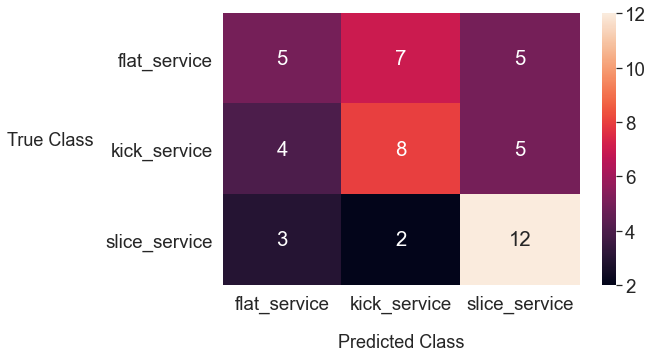

In [11]:
Y_pred_class = model.predict_classes(x_test)
Y_test_class = np.argmax(y_test, axis=1)

target_names = ['flat_service', 'kick_service', 'slice_service']
print(classification_report(Y_test_class, Y_pred_class, target_names=target_names))
conf_matrix = confusion_matrix(Y_test_class, Y_pred_class)

sns.set(font_scale=1.7)
df_cm = pd.DataFrame(conf_matrix, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (8,5))
ax = sns.heatmap(df_cm, annot=True)
ax.set_xlabel('Predicted Class', fontsize=18, labelpad=20)
ax.set_ylabel('True Class', fontsize=18, rotation=0, labelpad=55)
plt.show()